In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Abel\Downloads\forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:xlabel='size_category', ylabel='count'>

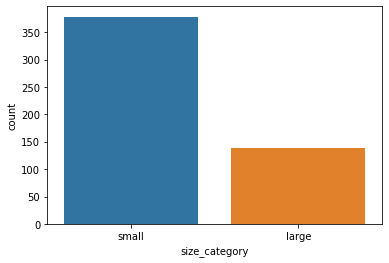

In [6]:
sns.countplot(x='size_category',data=df)

In [7]:
x=df.iloc[:,0:30]
y=df.iloc[:,-1]


In [8]:
X=pd.get_dummies(x)


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std=StandardScaler()
x_std=std.fit_transform(X)

## Grid Search for best epoch and batch size

In [11]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [12]:
def create_model1():    
    model = Sequential()
    model.add(Dense(12, input_dim=47, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
    return model

In [33]:
model=KerasClassifier(build_fn=create_model)

In [14]:
grid=GridSearchCV(estimator=model,param_grid={'batch_size':[10,20,30],'epochs':[100,10,20]},cv=KFold())

In [15]:
grid.fit(x_std,y)

Epoch 1/100
42/42 [==============================] - 0s 521us/step - loss: 0.6637 - accuracy: 0.6387
Epoch 2/100
42/42 [==============================] - 0s 462us/step - loss: 0.6672 - accuracy: 0.6235
Epoch 3/100
42/42 [==============================] - 0s 511us/step - loss: 0.6448 - accuracy: 0.6619
Epoch 4/100
42/42 [==============================] - 0s 511us/step - loss: 0.6696 - accuracy: 0.6186
Epoch 5/100
42/42 [==============================] - 0s 511us/step - loss: 0.6474 - accuracy: 0.6585
Epoch 6/100
42/42 [==============================] - 0s 535us/step - loss: 0.6501 - accuracy: 0.6507
Epoch 7/100
42/42 [==============================] - 0s 487us/step - loss: 0.6472 - accuracy: 0.6547
Epoch 8/100
42/42 [==============================] - 0s 511us/step - loss: 0.6191 - accuracy: 0.6928
Epoch 9/100
42/42 [==============================] - 0s 511us/step - loss: 0.6315 - accuracy: 0.6996
Epoch 10/100
42/42 [==============================] - 0s 535us/step - loss: 0.6484 - accura

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001627C50B640>,
             param_grid={'batch_size': [10, 20, 30], 'epochs': [100, 10, 20]})

In [16]:
grid.best_score_ , grid.best_params_

(0.7946601867675781, {'batch_size': 30, 'epochs': 100})

## Grid Search for learning rate and Kernel Initializer

In [17]:
def create_model(learning_rate,init):
    model1 = Sequential()
    model1.add(Dense(12, input_dim=47, kernel_initializer=init, activation='relu'))
    model1.add(Dense(8, kernel_initializer=init, activation='relu'))
    model1.add(Dense(10, kernel_initializer=init, activation='relu'))
    model1.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    
    model1.compile(loss = 'binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model1
        

In [18]:
model1=KerasClassifier(create_model)

In [19]:
grid1=GridSearchCV(estimator=model1,param_grid={'learning_rate':[0.1,0.01,0.3],'init':['uniform','zero','normal']},cv=KFold())

In [20]:
grid1.fit(x_std,y)

17/17 [==============================] - 0s 561us/step - loss: 0.6807 - accuracy: 0.6709


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000162020626A0>,
             param_grid={'init': ['uniform', 'zero', 'normal'],
                         'learning_rate': [0.1, 0.01, 0.3]})

In [21]:
grid1.best_score_ ,grid1.best_params_

(0.7305825233459473, {'init': 'uniform', 'learning_rate': 0.01})

## Final Model

In [35]:

model_fin = Sequential()
model_fin.add(Dense(12,input_dim=47,kernel_initializer='uniform', activation='relu'))
model_fin.add(Dense(10,activation='relu'))
model_fin.add(Dense(12,activation='relu'))
model_fin.add(Dense(1,activation='sigmoid'))
    

model_fin.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.1),metrics=['accuracy'])
    

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [30]:
model_fin.fit(x_std,Y, batch_size=30,epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 611us/step - loss: 0.6228 - accuracy: 0.7026
Epoch 2/100
18/18 [==============================] - 0s 469us/step - loss: 0.5647 - accuracy: 0.7361
Epoch 3/100
18/18 [==============================] - 0s 587us/step - loss: 0.5423 - accuracy: 0.7361
Epoch 4/100
18/18 [==============================] - 0s 580us/step - loss: 0.4583 - accuracy: 0.8011
Epoch 5/100
18/18 [==============================] - 0s 657us/step - loss: 0.4438 - accuracy: 0.8196
Epoch 6/100
18/18 [==============================] - 0s 588us/step - loss: 0.4015 - accuracy: 0.8395
Epoch 7/100
18/18 [==============================] - 0s 587us/step - loss: 0.3794 - accuracy: 0.8631
Epoch 8/100
18/18 [==============================] - 0s 528us/step - loss: 0.2943 - accuracy: 0.8748
Epoch 9/100
18/18 [==============================] - 0s 645us/step - loss: 0.3112 - accuracy: 0.8903
Epoch 10/100
18/18 [==============================] - 0s 763us/step - loss: 0.3283 - accura

In [25]:
y_pred=model_fin.predict(x_std)

In [26]:
def sig(y):
    for i in y_pred:
        if i < 0.5:
            print ('large')
        else:
            print('small')

In [27]:
sig(y_pred)

small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
small
smal

In [31]:
model_fin.evaluate(x_std,Y)

17/17 [==============================] - 0s 499us/step - loss: 0.0013 - accuracy: 1.0000


[0.0012914022663608193, 1.0]